__Задача 2__

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:
```
202, 203, 199, 197, 195, 201, 200, 204, 194, 190
```
Известно, что их веса распределены нормально. 
1. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%? 
2. Найдите P-значение для данного теста.

Нулевая гипотеза $H_0$, говорит о том, что мат ожидание $\mu$ равно 200

Для решения задачи используем $t$ статистику(Стьюдента):

$$t = \dfrac{\overline{X} - \mu}{\sigma_X / \sqrt{n}},$$

При верности $H_0$,эта статистика имеет распределение с параметром $df = n -1 $ 

In [1]:
import numpy as np
from scipy import stats

In [2]:
samples = np.array ([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])

n = samples.size
mean = samples.mean()
std = samples.std(ddof = 1)

print(n, mean, std)

10 198.5 4.453463071962462


Уровень значимости $\alpha$ равен 0.01, находим квантили:

In [3]:
alpha = 0.01 

t1 = stats.t.ppf(alpha / 2, df = n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df = n - 1)

print(t1, t2)

-3.24983554401537 3.2498355440153697


Полученная критическая область:

$$\Omega_\alpha = (-\infty, -3.25) \cup (3.25, \infty)$$

Теперь можно посчитать значение статистики $t$ и сделать заключение:

In [4]:
t = (mean - 200) / (std / np.sqrt(n))
print(t)

-1.0651074037450896


Значение $t$ статистики не попало в критическую область, следовательно, данные не противоречат гипотезе $H_0$.

Теперь найдем P-значение для двухсторонней области:

$$P = 2 \cdot \min (P_l, P_r)$$

$P_l = F_t(t), P_r = F_t(t), F_t(x)$ - функция распределения нашей статистики. В нашем примере это t-распределение:

In [5]:
p_left = stats.t.cdf(t, df = n - 1)
p_right = 1 - stats.t.cdf(t, df = n -1 )

pvalue = 2 * min (p_left, p_right)

print(p_left, p_right, pvalue)

0.15728330176236427 0.8427166982376357 0.31456660352472854


если выбранный нами уровень значимости меньше P-значения, полученного в результате теста, то гипотезу можно принять. В нашем случае мы ее принимаем

__Задача 3__

Дана выборка диаметров подшипников из примера 1 с занятия 5:
```
samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ]
```
Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна `0.0625` при уровне значимости `alpha = 0.05`. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: `H = (n - 1) * sample_variance / variance`, где `n` - число элементов в выборке, `sample_variance` - несмещённая оценка дисперсии, `variance` - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром `df = n - 1`. Её квантили можно найти с помощью функции `scipy.stats.chi2.ppf`.


Проверяем гипотезу о том, что дисперсия равна ${\sigma^2} = 0.0625$. Возьмём для рассмотрения стастистику:

$H = (n - 1) \cdot \dfrac{\sigma^2x}{\sigma^2}$

В предположении верности гипотезы $H0$ данная статистика имеет распределение $X^2$ с параметром $df = n - 1$

In [6]:
samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ])

In [7]:
n = samples.shape[0]
sample_variance = samples.var(ddof = 1)

print(n, sample_variance)

24 0.07804495041666669


Найдем границы критической области для уровня значимости $\alpha = 0.05$:

In [8]:
alpha = 0.05

t1 = stats.chi2.ppf(alpha / 2, df = n - 1)
t2 = stats.chi2.ppf(1 - alpha / 2, df = n - 1)

print(t1, t2)

11.688551922452438 38.0756272503558


Найденная критическая область:
    
  $$\Omega_\alpha = (-\infty, 11.68) \cup (38.07, \infty)$$

In [9]:
from matplotlib import pyplot as plt 
plt.style.use('seaborn-whitegrid')

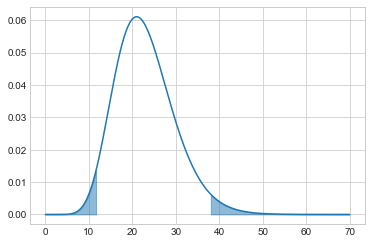

In [10]:
ox = np.linspace(0, 70, 500)
oy = stats.chi2.pdf(ox, df = n - 1)

ox_left = np.linspace(0, t1, 100)
oy_left = stats.chi2.pdf(ox_left, df = n - 1)

ox_right = np.linspace(t2, 70, 100)
oy_right = stats.chi2.pdf(ox_right, df = n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha = 0.5, color = 'C0')
plt.fill_between(ox_right, oy_right, alpha = 0.5, color = 'C0')

Находим значение статистики и проводит тест:

In [11]:
variance = 0.0625

H = (n - 1) * sample_variance / variance
print(H)

28.720541753333343


28.72 не попадает в критическую область, следовательно, гипотезу принимаем 